## Load libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Load the dataset

In [19]:
df = pd.read_csv("Binance_BTCUSDT_1h - Copy.csv")

In [20]:
df.head()

,date,symbol,open,high,low,close,Volume BTC,Volume USDT,tradecount
0,2017-08-17 04-AM,BTC/USDT,16199.91,16199.91,4261.32,4308.83,44.5100,190952.85,NaN
1,2017-08-17 05-AM,BTC/USDT,4308.83,4328.69,4291.37,4315.32,23.2300,100304.82,NaN
2,2017-08-17 06-AM,BTC/USDT,4315.32,4345.45,4309.37,4324.35,7.2300,31282.31,NaN
3,2017-08-17 07-AM,BTC/USDT,4324.35,4349.99,4287.41,4349.99,4.4400,19241.06,NaN
4,2017-08-17 08-AM,BTC/USDT,4349.99,4377.85,4333.32,4360.69,0.9499,4139.70,NaN


In [21]:
df['symbol'].value_counts()

BTC/USDT    36326
Name: symbol, dtype: int64

## Subset USD

In [22]:
#df = data.loc[(data['rpt_key'] == 'btc_usd')]

In [23]:
#df.head()

### Convert datetime_id to data type and filter dates greater than  2017-06-28 00:00:00

In [24]:
#df = df.reset_index(drop=True)
#df['datetime'] = pd.to_datetime(df['datetime_id'])
#df = df.loc[df['datetime'] > pd.to_datetime('2017-06-28 00:00:00')]

In [25]:
#df = df[['datetime', 'last', 'diff_24h', 'diff_per_24h', 'bid', 'ask', 'low', 'high', 'volume']]

In [26]:
#df.head()

### we require only the last value, so we subset that and convert it to numpy array

In [27]:
df = df[['close']]

In [28]:
dataset = df.values
dataset = dataset.astype('float32')

In [29]:
dataset

array([[ 4308.83],
       [ 4315.32],
       [ 4324.35],
       ...,
       [35650.1 ],
       [35600.16],
       [35503.87]], dtype=float32)

Neural networks are sensitive to input data, especiallly when we are using activation functions like sigmoid or tanh activation functions are used. ISo we rescale our data to the range of 0-to-1, using MinMaxScaler

In [30]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [31]:
dataset

array([[0.02254086],
       [0.02264611],
       [0.02279257],
       ...,
       [0.53084695],
       [0.530037  ],
       [0.52847534]], dtype=float32)

In [32]:
train_size = int(len(dataset))
#test_size = len(dataset) - train_size
train = dataset[0:train_size, :]
#train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train))

36326


Now let us define the function called create_dataset, which take two inputs, 

1. Dataset - numpy array that we want to convert into a dataset
2. look_back - number of previous time steps to use as input variables to predict the next time period


In [33]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [34]:
look_back = 2160
trainX, trainY = create_dataset(train, look_back=look_back)
#testX, testY = create_dataset(test, look_back=look_back)

In [35]:
trainX.shape

(34165, 2160)

In [36]:
trainY

array([0.06393401, 0.06334917, 0.06448446, ..., 0.52910215, 0.53084695,
       0.530037  ], dtype=float32)

In [37]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
#testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Build our Model

In [38]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=500, batch_size=256, verbose=2)

Epoch 1/500
134/134 - 1s - loss: 0.0024
Epoch 2/500
134/134 - 2s - loss: 3.3166e-04
Epoch 3/500
134/134 - 2s - loss: 2.7722e-04
Epoch 4/500
134/134 - 1s - loss: 2.3391e-04
Epoch 5/500
134/134 - 1s - loss: 4.3847e-04
Epoch 6/500
134/134 - 1s - loss: 1.8613e-04
Epoch 7/500
134/134 - 1s - loss: 1.6908e-04
Epoch 8/500
134/134 - 1s - loss: 1.6216e-04
Epoch 9/500
134/134 - 1s - loss: 1.6498e-04
Epoch 10/500
134/134 - 1s - loss: 1.3369e-04
Epoch 11/500
134/134 - 1s - loss: 1.1166e-04
Epoch 12/500
134/134 - 1s - loss: 1.4394e-04
Epoch 13/500
134/134 - 2s - loss: 1.2525e-04
Epoch 14/500
134/134 - 2s - loss: 2.1018e-04
Epoch 15/500
134/134 - 2s - loss: 9.6125e-05
Epoch 16/500
134/134 - 1s - loss: 1.0336e-04
Epoch 17/500
134/134 - 1s - loss: 1.3495e-04
Epoch 18/500
134/134 - 1s - loss: 1.7218e-04
Epoch 19/500
134/134 - 1s - loss: 1.0399e-04
Epoch 20/500
134/134 - 1s - loss: 1.0518e-04
Epoch 21/500
134/134 - 1s - loss: 1.0536e-04
Epoch 22/500
134/134 - 1s - loss: 1.0773e-04
Epoch 23/500
134/134 - 

Epoch 182/500
134/134 - 1s - loss: 3.7902e-05
Epoch 183/500
134/134 - 1s - loss: 6.8723e-05
Epoch 184/500
134/134 - 1s - loss: 3.3099e-05
Epoch 185/500
134/134 - 1s - loss: 4.2550e-05
Epoch 186/500
134/134 - 2s - loss: 4.6339e-05
Epoch 187/500
134/134 - 2s - loss: 3.4314e-05
Epoch 188/500
134/134 - 1s - loss: 5.6703e-05
Epoch 189/500
134/134 - 1s - loss: 5.4506e-05
Epoch 190/500
134/134 - 1s - loss: 7.4085e-05
Epoch 191/500
134/134 - 1s - loss: 4.7485e-05
Epoch 192/500
134/134 - 1s - loss: 2.8159e-05
Epoch 193/500
134/134 - 1s - loss: 4.9166e-05
Epoch 194/500
134/134 - 1s - loss: 4.1598e-05
Epoch 195/500
134/134 - 1s - loss: 4.1620e-05
Epoch 196/500
134/134 - 1s - loss: 5.1897e-05
Epoch 197/500
134/134 - 2s - loss: 4.1890e-05
Epoch 198/500
134/134 - 2s - loss: 4.1573e-05
Epoch 199/500
134/134 - 1s - loss: 4.6352e-05
Epoch 200/500
134/134 - 1s - loss: 3.8953e-05
Epoch 201/500
134/134 - 1s - loss: 3.3261e-05
Epoch 202/500
134/134 - 1s - loss: 8.5201e-05
Epoch 203/500
134/134 - 3s - loss:

134/134 - 3s - loss: 4.2671e-05
Epoch 361/500
134/134 - 3s - loss: 3.5697e-05
Epoch 362/500
134/134 - 3s - loss: 3.1674e-05
Epoch 363/500
134/134 - 3s - loss: 4.2502e-05
Epoch 364/500
134/134 - 3s - loss: 2.3566e-05
Epoch 365/500
134/134 - 3s - loss: 6.9324e-05
Epoch 366/500
134/134 - 3s - loss: 4.2883e-05
Epoch 367/500
134/134 - 2s - loss: 3.9287e-05
Epoch 368/500
134/134 - 3s - loss: 4.0965e-05
Epoch 369/500
134/134 - 3s - loss: 2.2400e-05
Epoch 370/500
134/134 - 3s - loss: 4.1638e-05
Epoch 371/500
134/134 - 3s - loss: 2.7252e-05
Epoch 372/500
134/134 - 3s - loss: 3.6665e-05
Epoch 373/500
134/134 - 3s - loss: 3.7296e-05
Epoch 374/500
134/134 - 3s - loss: 3.3449e-05
Epoch 375/500
134/134 - 3s - loss: 5.0855e-05
Epoch 376/500
134/134 - 3s - loss: 3.4514e-05
Epoch 377/500
134/134 - 3s - loss: 3.5916e-05
Epoch 378/500
134/134 - 3s - loss: 4.5431e-05
Epoch 379/500
134/134 - 3s - loss: 2.7892e-05
Epoch 380/500
134/134 - 3s - loss: 3.5356e-05
Epoch 381/500
134/134 - 2s - loss: 3.9839e-05
Ep

In [40]:
trainPredict = model.predict(trainX)
#testPredict = model.predict(testX)

We have to invert the predictions before calculating error to so that reports will be in same units as our original data

In [41]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
#testPredict = scaler.inverse_transform(testPredict)
#testY = scaler.inverse_transform([testY])

In [42]:

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
#testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
#print('Test Score: %.2f RMSE' % (testScore))


Train Score: 366.02 RMSE


In [43]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
 

In [44]:
 # shift test predictions for plotting
#testPredictPlot = np.empty_like(dataset)
#testPredictPlot[:, :] = np.nan
#testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
 


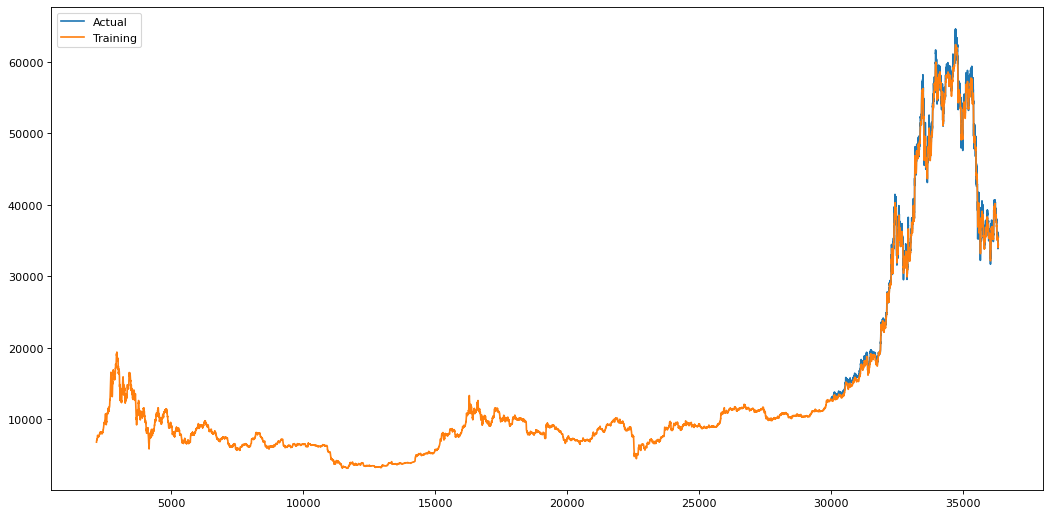

In [46]:
plt.figure(figsize=(16, 8), dpi=80, facecolor = 'w', edgecolor = 'k')
plt.plot(df['close'][30000:], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
#plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()
#mcd['Adj. Close'].plot(figsize=(12,4), xlim=['2007-01-01', '2009-01-01'], ylim=(30,50))  xlim=['2000', '2600']